In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 15

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/twsoi/OneDrive - stevens.edu/Fruitful/Data/Banana",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2000 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['F_Banana', 'S_Banana']

In [5]:
len(dataset)

63

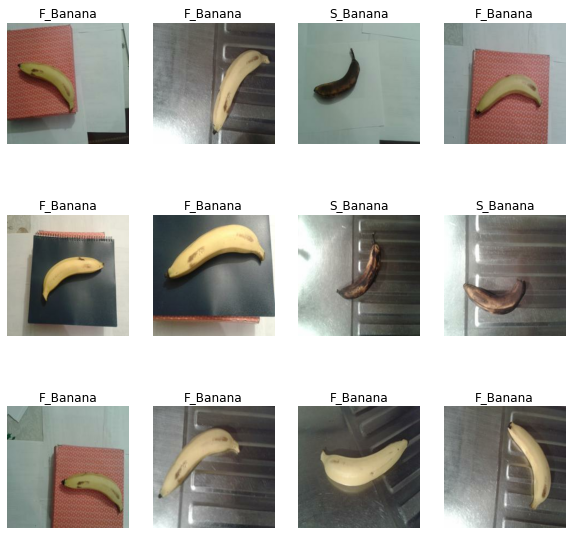

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

63

In [8]:
train_size = 0.8
len(dataset)*train_size

50.400000000000006

In [9]:
train_ds = dataset.take(50)
len(train_ds)

50

In [10]:
test_ds = dataset.skip(50)
len(test_ds)

13

In [11]:
val_size = 0.1
len(dataset)*val_size

6.300000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

7

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

50

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

7

In [19]:
len(dataset)

63

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 111, 111, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 54, 54, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
50/50 [==============================] - 141s 3s/step - loss: 0.6775 - accuracy: 0.5467 - val_loss: 0.4607 - val_accuracy: 0.8542
Epoch 2/15
50/50 [==============================] - 128s 3s/step - loss: 0.4186 - accuracy: 0.8359 - val_loss: 0.3465 - val_accuracy: 0.9040
Epoch 3/15
50/50 [==============================] - 122s 2s/step - loss: 0.3272 - accuracy: 0.8744 - val_loss: 0.1809 - val_accuracy: 0.9280
Epoch 4/15
50/50 [==============================] - 124s 2s/step - loss: 0.2465 - accuracy: 0.9072 - val_loss: 0.1466 - val_accuracy: 0.9577
Epoch 5/15
50/50 [==============================] - 122s 2s/step - loss: 0.1067 - accuracy: 0.9672 - val_loss: 0.1070 - val_accuracy: 0.9640
Epoch 6/15
50/50 [==============================] - 123s 2s/step - loss: 0.2121 - accuracy: 0.9299 - val_loss: 0.2717 - val_accuracy: 0.9198
Epoch 7/15
50/50 [==============================] - 123s 2s/step - loss: 0.1888 - accuracy: 0.9362 - val_loss: 0.0518 - val_accuracy: 0.9880
Epoch 8/15
50

In [27]:
scores = model.evaluate(test_ds)

50/50 [==============================] - 27s 532ms/step - loss: 0.0142 - accuracy: 0.9968


In [29]:
scores

[0.014234674163162708, 0.9968434572219849]

In [30]:
history

In [31]:
history.history['accuracy']

[0.5467171669006348,
 0.8358585834503174,
 0.8743686676025391,
 0.9071969985961914,
 0.9671717286109924,
 0.9299242496490479,
 0.9362373948097229,
 0.9343434572219849,
 0.9785353541374207,
 0.9842171669006348,
 0.9911616444587708,
 0.9880050420761108,
 0.993686854839325,
 0.9551767706871033,
 0.9924242496490479]

first image to predict
actual label: F_Banana
predicted_label: F_Banana


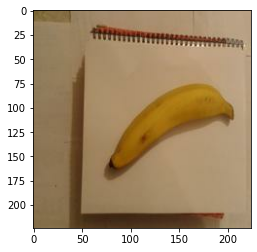

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted_label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

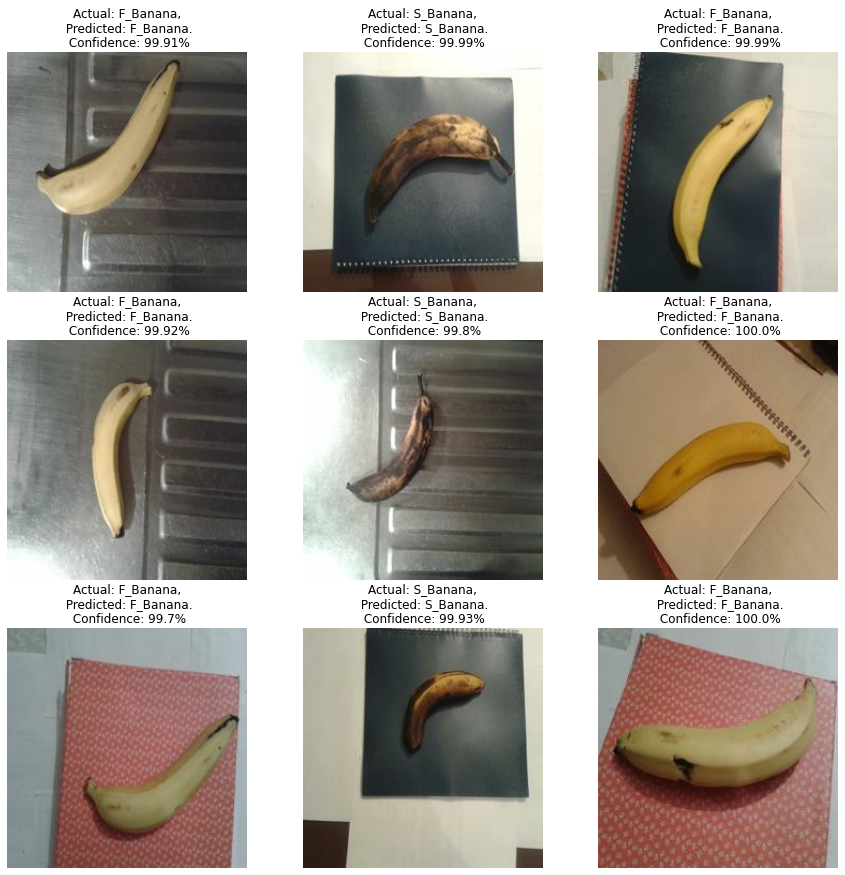

In [34]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [34]:
model_version=1
model.save(f"C:/Users/twsoi/OneDrive - stevens.edu/Fruitful/Banana Model/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/twsoi/OneDrive - stevens.edu/Fruitful/Banana Model/1\assets


In [35]:
model.save('BananaModel.h5')